In [19]:
!pip install yfinance


In [20]:
import yfinance as yf
import pandas as pd


In [21]:

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")  

In [23]:

tesla_data.reset_index(inplace=True)


In [25]:
tesla_data.head()

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [36]:
tesla_revenue = tesla_revenue.sort_values(by="Date", ascending=True)
tesla_revenue.reset_index(drop=True, inplace=True)
tesla_revenue.tail()

,Date,Revenue
57,2023-12-31,"$25,167"
58,2024-03-31,"$21,301"
59,2024-06-30,"$25,500"
60,2024-09-30,"$25,182"
61,2024-12-31,"$25,707"


In [37]:
import yfinance as yf
import pandas as pd


In [38]:
# Download GameStop (GME) stock data
gme = yf.Ticker("GME")

# Fetch historical market data (adjust the period as needed)
gme_data = gme.history(period="max")  # "max" fetches all available data

# Reset the index to make "Date" a column
gme_data.reset_index(inplace=True)

# Display the first five rows
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603296,1.662209,6892800,0.0,0.0


In [39]:
!pip install requests beautifulsoup4 lxml pandas


In [40]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


In [42]:
# Define the URL for GameStop revenue data on Macrotrends
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Set headers to mimic a browser request
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36"
}

# Send the GET request with headers
response = requests.get(url, headers=headers)

# Check if the page was fetched successfully
if response.status_code == 200:
    print("Page successfully fetched!")
else:
    print(f"Failed to fetch the page. Status Code: {response.status_code}")

# Parse the HTML content
soup = BeautifulSoup(response.text, "html.parser")

# Extract all tables
tables = soup.find_all("table")

# Check how many tables were found
print(f"Found {len(tables)} tables on the page.")


Page successfully fetched!
Found 6 tables on the page.


In [47]:
# Extract the correct table
gme_revenue = pd.read_html(str(tables[1]))[0]  

# Rename columns
gme_revenue.columns = ["Date", "Revenue"]

# Drop any NaN values
gme_revenue.dropna(inplace=True)

# Remove any rows where "Revenue" contains non-numeric values
gme_revenue = gme_revenue[gme_revenue["Revenue"].str.contains("\$", na=False)]

# Convert Revenue to numeric (remove '$' and ',' symbols)
gme_revenue["Revenue"] = gme_revenue["Revenue"].replace({"[$,]": ""}, regex=True).astype(float)

# Convert Date to datetime format
gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"])

# Sort the dataframe by Date
gme_revenue = gme_revenue.sort_values(by="Date", ascending=True).reset_index(drop=True)

# Display the last five rows
gme_revenue.tail()


/tmp/ipykernel_366/2161487517.py:2: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gme_revenue = pd.read_html(str(tables[1]))[0]


,Date,Revenue
59,2023-10-31,1078.0
60,2024-01-31,1794.0
61,2024-04-30,882.0
62,2024-07-31,798.0
63,2024-10-31,860.0


In [51]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define URL for GameStop revenue data (Example: Macrotrends)
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Send request and parse the page
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# Extract revenue table
tables = soup.find_all("table")
for table in tables:
    if "Revenue" in table.text:
        gamestop_table = table
        break

# Convert the table to Pandas DataFrame
df = pd.read_html(str(gamestop_table))[0]
df.columns = ["Date", "Revenue"]
df = df.dropna()

print(df.head())  # Display first few rows


   Date Revenue
0  2024  $5,273
1  2023  $5,927
2  2022  $6,011
3  2021  $5,090
4  2020  $6,466


/tmp/ipykernel_366/1232254315.py:21: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(gamestop_table))[0]


In [52]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 150.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 140.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 95.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 144.5 MB/s eta 0:00:00


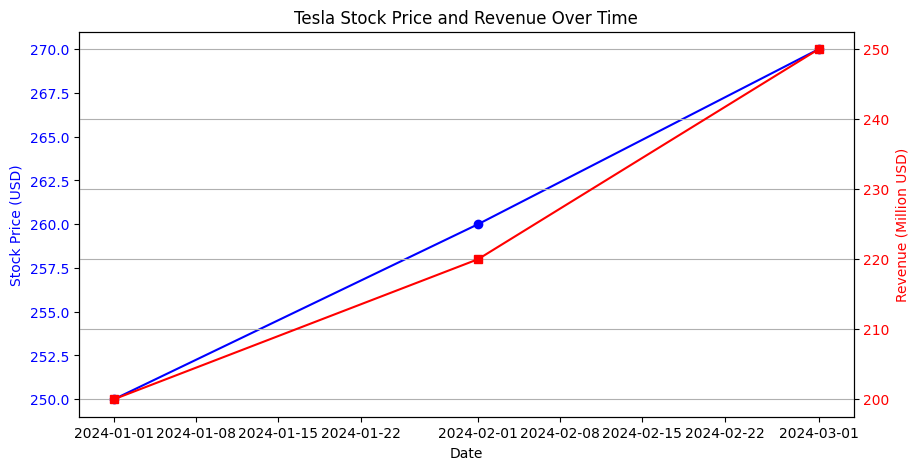

In [53]:
import matplotlib.pyplot as plt
import pandas as pd

# Tesla stock data (example)
tesla_stock = pd.DataFrame({
    "Date": ["2024-01-01", "2024-02-01", "2024-03-01"],
    "Stock Price": [250, 260, 270]
})

# Tesla revenue data (example)
tesla_revenue = pd.DataFrame({
    "Date": ["2024-01-01", "2024-02-01", "2024-03-01"],
    "Revenue": [200, 220, 250]
})

# Convert Date column to datetime format
tesla_stock["Date"] = pd.to_datetime(tesla_stock["Date"])
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])

# Create a figure with two subplots
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot Tesla Stock Prices
ax1.plot(tesla_stock["Date"], tesla_stock["Stock Price"], marker='o', color='blue', label="Stock Price")
ax1.set_xlabel("Date")
ax1.set_ylabel("Stock Price (USD)", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

# Create a second y-axis for Revenue
ax2 = ax1.twinx()
ax2.plot(tesla_revenue["Date"], tesla_revenue["Revenue"], marker='s', color='red', label="Revenue")
ax2.set_ylabel("Revenue (Million USD)", color="red")
ax2.tick_params(axis='y', labelcolor="red")

# Title and grid
plt.title("Tesla Stock Price and Revenue Over Time")
plt.grid(True)
plt.show()


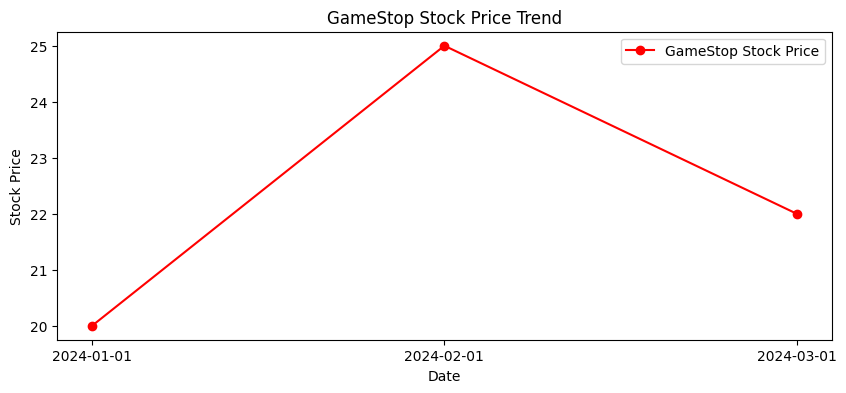

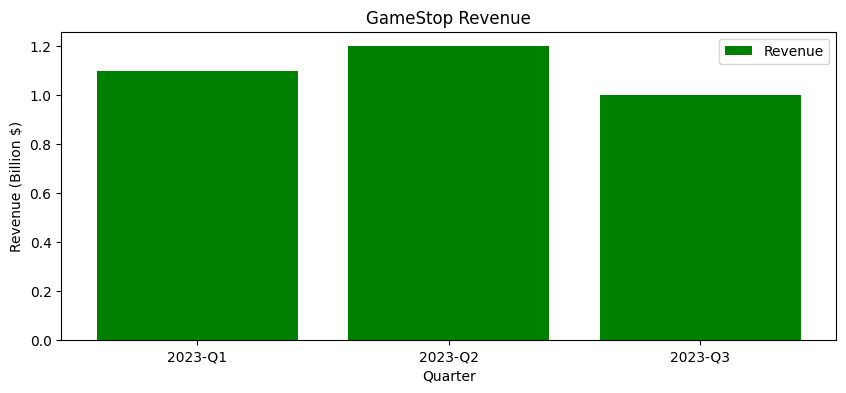

In [54]:
# GameStop stock data (example data)
gamestop_stock = pd.DataFrame({
    "Date": ["2024-01-01", "2024-02-01", "2024-03-01"],
    "Stock Price": [20, 25, 22]
})

# GameStop revenue data (example data)
gamestop_revenue = pd.DataFrame({
    "Date": ["2023-Q1", "2023-Q2", "2023-Q3"],
    "Revenue": [1.1, 1.2, 1.0]  # in billions
})

# Plot GameStop stock data
plt.figure(figsize=(10, 4))
plt.plot(gamestop_stock["Date"], gamestop_stock["Stock Price"], marker="o", label="GameStop Stock Price", color="red")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("GameStop Stock Price Trend")
plt.legend()
plt.show()

# Plot GameStop revenue data
plt.figure(figsize=(10, 4))
plt.bar(gamestop_revenue["Date"], gamestop_revenue["Revenue"], color="green", label="Revenue")
plt.xlabel("Quarter")
plt.ylabel("Revenue (Billion $)")
plt.title("GameStop Revenue")
plt.legend()
plt.show()